In [1]:
# Instructions

In [2]:
# Create a query or queries to extract the information you think may be relevant for building the prediction model.
# It should include some film features and some rental features. Use the data from 2005.

In [6]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [5]:
# First, we run on SQL the following query to check and see which columns are of interest in the inventory, film and rental tables
# We also decided to filter the data on SQL based on the the rental date (2005)
# We then did a join, running the following code on SQL
# We use a inner join as the left one shows the same results

SELECT film_id, title, inventory_id, rental_id, rental_date, store_id, rental_duration, rental_rate, rating
FROM film
LEFT JOIN inventory
USING (film_id)
JOIN rental 
USING (inventory_id)
WHERE rental_date > '2005-01-01' AND rental_date < '2005-12-31' 
ORDER by rental_date DESC

SyntaxError: invalid syntax (<ipython-input-5-4e5a7bb424d9>, line 6)

In [7]:
# Read the data into a Pandas dataframe.

connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT film_id, title, length, inventory_id, rental_id, rental_date, amount, store_id, rental_duration, rental_rate, rating
FROM film
LEFT JOIN inventory
USING (film_id)
JOIN rental 
USING (inventory_id)
JOIN payment
USING (rental_id)
WHERE rental_date > '2005-01-01' AND rental_date < '2005-12-31' 
ORDER by rental_date DESC;'''

data = pd.read_sql_query(query, engine)
data.head()

,film_id,title,length,inventory_id,rental_id,rental_date,amount,store_id,rental_duration,rental_rate,rating
0,585,MOB DUFFEL,105,2666,16049,2005-08-23 22:50:12,3.99,2,4,0.99,G
1,439,HUNCHBACK IMPOSSIBLE,151,2019,16048,2005-08-23 22:43:07,8.99,1,4,4.99,PG-13
2,452,ILLUSION AMELIE,122,2088,16047,2005-08-23 22:42:48,0.99,2,4,0.99,R
3,951,VOYAGE LEGALLY,78,4364,16046,2005-08-23 22:26:47,0.99,2,6,0.99,PG-13
4,168,COMANCHEROS ENEMY,67,772,16045,2005-08-23 22:25:26,0.99,1,5,0.99,R


In [8]:
data.dtypes

film_id                     int64
title                      object
length                      int64
inventory_id                int64
rental_id                   int64
rental_date        datetime64[ns]
amount                    float64
store_id                    int64
rental_duration             int64
rental_rate               float64
rating                     object
dtype: object

In [9]:
from datetime import datetime

In [10]:
#Create a query to get the list of films and a boolean indicating if it was rented last month (August 2005). This would be our target variable.

#create a function to split in yes or no the movies rented in august

def rent_august(date): #argument is what is filled inside, what you want to discover 
    if date >= datetime.strptime('2005-08-01 00:00:00', '%Y-%m-%d %H:%M:%S') and date <= datetime.strptime('2005-08-31 23:59:59', '%Y-%m-%d %H:%M:%S'):
        return "Yes"
    else:
        return "No"

In [11]:
# TypeError: '>=' not supported between instances of 'Timestamp' and 'str'

# Easy not easy fix: datetime.strptime('2005-08-01 00:00:00', '%d/%m/%y %H:%M:%S')

In [12]:
data['rent_movie_august'] = list(map(rent_august, data['rental_date'])) #last insert '' is the variable you want it to apply into
data.sample(40)

,film_id,title,length,inventory_id,rental_id,rental_date,amount,store_id,rental_duration,rental_rate,rating,rent_movie_august
11214,625,NONE SPIKING,83,2850,4650,2005-07-08 09:32:08,4.99,1,3,0.99,NC-17,No
10726,284,ENEMY ODDS,77,1283,5138,2005-07-09 08:00:46,4.99,1,5,4.99,NC-17,No
7581,953,WAIT CIDER,112,4371,8284,2005-07-29 01:56:40,6.99,1,3,0.99,PG-13,No
977,856,STREETCAR INTENTIONS,73,3926,15031,2005-08-22 09:11:48,4.99,2,5,4.99,R,Yes
4270,244,DORADO NOTTING,139,1098,11601,2005-08-17 03:14:47,4.99,1,5,4.99,NC-17,Yes
8841,683,PITY BOUND,60,3113,7024,2005-07-27 02:36:40,4.99,2,5,4.99,NC-17,No
10933,603,MOVIE SHAKESPEARE,53,2750,4931,2005-07-08 22:16:18,7.99,1,6,4.99,PG,No
11945,591,MONSOON CAUSE,182,2695,3919,2005-07-06 20:26:21,7.99,2,6,4.99,PG,No
10471,310,FEVER EMPIRE,158,1417,5393,2005-07-09 19:35:12,4.99,1,5,4.99,R,No
2237,44,ATTACKS HATE,113,200,13724,2005-08-20 10:07:28,4.99,2,5,4.99,PG-13,Yes


In [13]:
# in case you want to use apply
# data['rent_movie_august'] = data['rental_date'].apply(rent_august)

In [14]:
#Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

In [15]:
# we need to predict the amount of movies that are going to be rented in august next year.

# check the data types
data.dtypes

film_id                       int64
title                        object
length                        int64
inventory_id                  int64
rental_id                     int64
rental_date          datetime64[ns]
amount                      float64
store_id                      int64
rental_duration               int64
rental_rate                 float64
rating                       object
rent_movie_august            object
dtype: object

In [16]:
# check the value count of our dependent variable 
data['rent_movie_august'].value_counts()

No     10176
Yes     5686
Name: rent_movie_august, dtype: int64

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rent_movie_august', ylabel='count'>

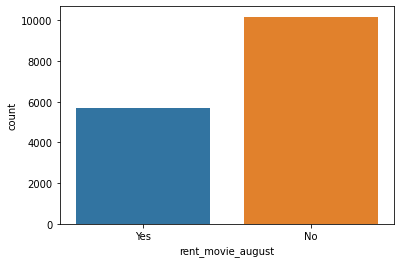

In [17]:
#and now let's visualise the depedent variable

import seaborn as sns
%matplotlib inline
sns.countplot(data.rent_movie_august)

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='store_id', ylabel='count'>

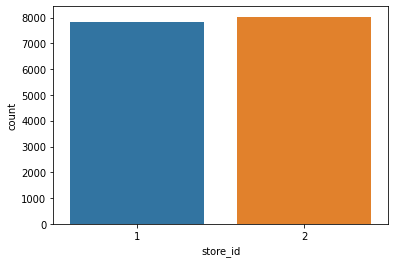

In [18]:
# and the other categorical variables of interest
sns.countplot(data.store_id)

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

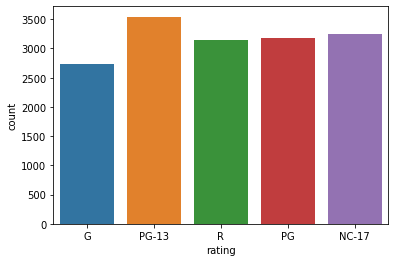

In [19]:
#checking for cases of rating. As expected, they are very similar to eachother 

sns.countplot(data.rating)

In [ ]:
#checking title variable ONLY to see if major films are recurrent

sns.displot(data['title'])
plt.show()

NameError: name 'plt' is not defined

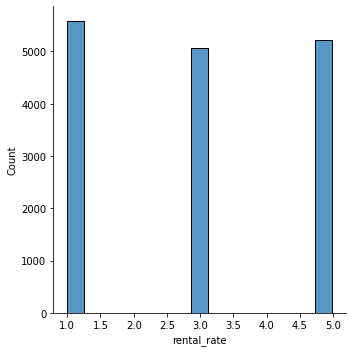

In [21]:
# look at the scale and distribution of numeric values
import matplotlib.pyplot as plt

sns.displot(data['rental_rate'])
plt.show()

NameError: name 'plt' is not defined

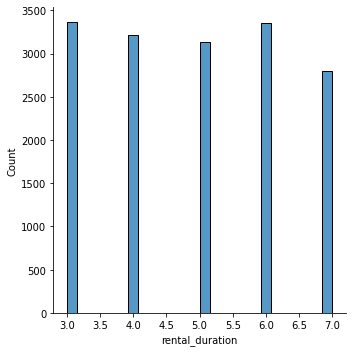

In [22]:
sns.displot(data['rental_duration'])
plt.show()

In [23]:
# changing store_id into string as it indicates which store and doesn't make sense as continuous variable
data['store_id'] = data['store_id'].astype(str)
data.dtypes

film_id                       int64
title                        object
length                        int64
inventory_id                  int64
rental_id                     int64
rental_date          datetime64[ns]
amount                      float64
store_id                     object
rental_duration               int64
rental_rate                 float64
rating                       object
rent_movie_august            object
dtype: object

In [24]:
# splitting the dataset into categorical and numerical
import numpy as np

x_cat = data.select_dtypes(include = np.object)

In [25]:
x_num = data.select_dtypes(include = np.number)

In [26]:
x_cat.head()

,title,store_id,rating,rent_movie_august
0,MOB DUFFEL,2,G,Yes
1,HUNCHBACK IMPOSSIBLE,1,PG-13,Yes
2,ILLUSION AMELIE,2,R,Yes
3,VOYAGE LEGALLY,2,PG-13,Yes
4,COMANCHEROS ENEMY,1,R,Yes


In [27]:
x_num.head()

# it didn't take the variable date into account, but I am happy about it. should have been dropped anyway

,film_id,length,inventory_id,rental_id,amount,rental_duration,rental_rate
0,585,105,2666,16049,3.99,4,0.99
1,439,151,2019,16048,8.99,4,4.99
2,452,122,2088,16047,0.99,4,0.99
3,951,78,4364,16046,0.99,6,0.99
4,168,67,772,16045,0.99,5,0.99


In [28]:
# checking for the correlation matrix on continuous variables
import matplotlib.pyplot as plt

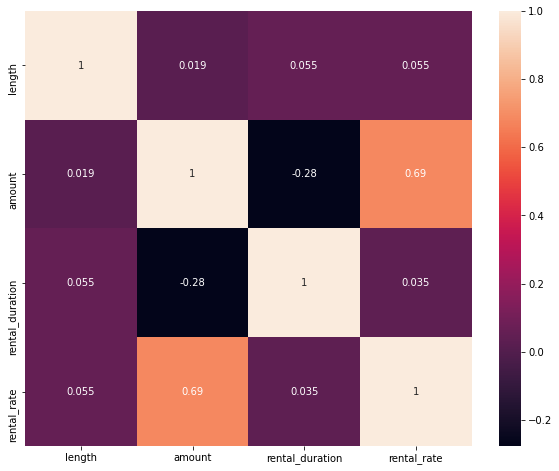

In [51]:
corr_matrix= x_num.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# no correlation between variables = gooood

In [30]:
# Dropping categorical variables which, after discussion, are useless in the analysis and depedent variable
x_cat = x_cat.drop(['title','rent_movie_august'], axis=1)

In [32]:
x_cat

,store_id,rating
0,2,G
1,1,PG-13
2,2,R
3,2,PG-13
4,1,R
...,...,...
15857,2,NC-17
15858,1,R
15859,2,G
15860,2,R


In [31]:
# Dropping the depedent variable in order to run the analysis
x_num = x_num.drop(['film_id','rental_id','inventory_id'], axis=1)

In [33]:
x_num

,length,amount,rental_duration,rental_rate
0,105,3.99,4,0.99
1,151,8.99,4,4.99
2,122,0.99,4,0.99
3,78,0.99,6,0.99
4,67,0.99,5,0.99
...,...,...,...,...
15857,84,6.99,5,2.99
15858,181,4.99,6,0.99
15859,156,3.99,7,2.99
15860,126,2.99,7,2.99


In [34]:
# create dummies and toss out redundant variables
x_cat = pd.get_dummies(x_cat, 
                             columns=['store_id','rating'],
                             drop_first=True)
x_cat.head()

,store_id_2,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,1,0,0,1,0
4,0,0,0,0,1


In [35]:
#Create a logistic regression model to predict this variable from the cleaned data.

# build X and y 
# y dependent variable taken from data original dataset
y = data['rent_movie_august']

In [36]:
#concatenate indepedent variables together num and cat

X = np.concatenate((x_num, x_cat), axis=1)
X

array([[105.  ,   3.99,   4.  , ...,   0.  ,   0.  ,   0.  ],
       [151.  ,   8.99,   4.  , ...,   0.  ,   1.  ,   0.  ],
       [122.  ,   0.99,   4.  , ...,   0.  ,   0.  ,   1.  ],
       ...,
       [156.  ,   3.99,   7.  , ...,   0.  ,   0.  ,   0.  ],
       [126.  ,   2.99,   7.  , ...,   0.  ,   0.  ,   1.  ],
       [148.  ,   2.99,   7.  , ...,   0.  ,   0.  ,   0.  ]])

In [37]:
# import train test split package
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# import logistic regression package
from sklearn.linear_model import LogisticRegression

In [49]:
# need to change solver into ('saga'), there are 3 solvers (+1 on depedent variable categories)
import warnings
warnings.filterwarnings('ignore')
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train, y_train)

In [50]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.6373187644463123

In [52]:
# check for imbalance in outcome
print(y_test.value_counts())

No     3033
Yes    1726
Name: rent_movie_august, dtype: int64


In [53]:
# compare datasets to check accuracy of prediction
pd.Series(predictions).value_counts()

No    4759
dtype: int64

In [54]:
# confusion matrix between test and actual values

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[3033,    0],
       [1726,    0]])

In [43]:
# bonus: KNN classifier: look at nearest neighbours and use the majority to determine class
from sklearn import neighbors

In [45]:
# define neighbors, needs to be always +1 the number of categories
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [46]:
# if you give a point KNN will take a look on the points that are the closest.
# define neighborns, out of 5 with the 4 categories, there will be always 1 out of 4 category that will be repetead
clf.fit(X, y)

#then run the prediction
predictions_clf = clf.predict(X_test)
clf.score(X_test, y_test)

0.7005673460811095

In [56]:
confusion_matrix(y_test, predictions_clf)

array([[2499,  534],
       [ 891,  835]])

### Evaluate the results.

We have discussed the final model, and we can assert that the correlation is somewhat strong from the prediction coefficient (0.70).

By checking the confusion matrix, we can also see that the for each value of our predicted A there is a match to A actual of 2499, and there are 835 correct predictions between the movies that have been rented actually and the one which our prediction correctly analyse. 

However, let's be cautious: we can see our prediction doesn't align in many cases, showing 534 cases of B being wrongly predicted as A; as well as 891 cases of B A wrongly predicted as B.